In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_std = 0.8100

[[0.2060137  0.2101227  0.14879412 0.14391229 0.13706932 0.18485353
  0.36767247 0.24044494 0.31660327 0.1422025  0.17545543]
 [0.18821464 0.20531666 0.1904792  0.16443447 0.1418447  0.18167064
  0.34297282 0.237714   0.35991922 0.12278071 0.15179372]
 [0.17535234 0.24638638 0.14895765 0.187346   0.16099054 0.18967289
  0.33534523 0.25151563 0.3181139  0.1494605  0.16097464]
 [0.17919011 0.22875641 0.14559554 0.17784124 0.13292906 0.19733166
  0.36515821 0.25210794 0.39638607 0.18042065 0.14160888]
 [0.19941588 0.19064308 0.20701639 0.13533649 0.12022279 0.19217245
  0.34409218 0.23668125 0.3497871  0.14045652 0.18067762]]
[0.19613842 0.20371146 0.2095571  0.22385532 0.20990055 0.20005742
 0.31071462 0.2122319  0.45488088 0.24052663 0.12110908]


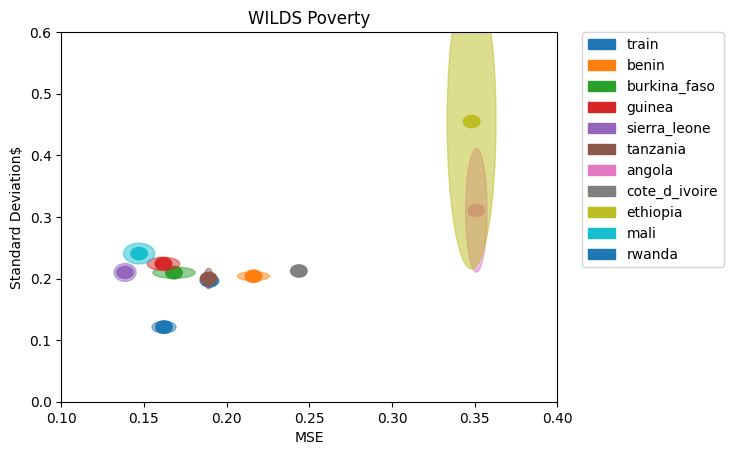

In [7]:
run_names = ["poverty2_49", "poverty2_51", "poverty2_52", "poverty2_53", "poverty2_54"]
countries = ["train", 'benin', 'burkina_faso', 'guinea', 'sierra_leone', 'tanzania', 'angola', 'cote_d_ivoire', 'ethiopia', 'mali', 'rwanda']
mses_all = []
dist_from_f_starts_all = []
for run_name in run_names:
    with open("data/"+run_name+'/outputs.pkl', 'rb') as f:
        data = pickle.load(f)
    

    mses = []
    dist_from_f_starts = []
    for country in countries:
        dist_from_f_start = np.mean((data[country][:, 1])**2)
        mse = data[country][:, 2].mean()
        mses.append(mse)
        dist_from_f_starts.append(dist_from_f_start)
    mses_all.append(mses)
    dist_from_f_starts_all.append(dist_from_f_starts)
mses_all = np.array(mses_all)
dist_from_f_starts_all = np.array(dist_from_f_starts_all)
# plt.plot(1-np.array(accuracies_all.mean(axis=0)), dist_from_f_starts_all.mean(axis=0), "o-")
# #plot error bars
# plt.fill_between(1-np.array(accuracies_all.mean(axis=0)), dist_from_f_starts_all.mean(axis=0)-dist_from_f_starts_all.std(axis=0), dist_from_f_starts_all.mean(axis=0)+dist_from_f_starts_all.std(axis=0), alpha=0.2)
# plt.legend()


# labels = ["Product (Train)", "Photo", "Clipart", "Art"]
from matplotlib.patches import Ellipse
plt.figure()
ax = plt.gca()
colors = ["C"+str(i) for i in range(len(countries))]
print(mses_all)
print(dist_from_f_starts_all.mean(axis=0))
# plt.plot(np.array(mses_all.mean(axis=0)), dist_from_f_starts_all.mean(axis=0))#, c = "black", alpha=0.5, zorder=-1)


for i in range(len(countries)):
    ellipse = Ellipse(xy=(mses_all.mean(axis=0)[i], dist_from_f_starts_all.mean(axis=0)[i]), width=mses_all.std(axis=0)[i], height=dist_from_f_starts_all.std(axis=0)[i], color=colors[i], alpha=0.5)
                            # edgecolor='r', fc='None', lw=2)
    ax.add_patch(ellipse, )
    r = 0.01
    ellipse = Ellipse(xy=(mses_all.mean(axis=0)[i], dist_from_f_starts_all.mean(axis=0)[i]), width=r, height=2*r, color=colors[i])
                            # edgecolor='r', fc='None', lw=2)
    ax.add_patch(ellipse, )
    ellipse.set(label = countries[i])
plt.xlabel("MSE")
plt.ylabel("Standard Deviation$")
plt.ylim(0, 0.6)
plt.xlim(0.1, 0.4)
plt.title("WILDS Poverty")

#put legend on the side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.legend()

In [25]:
# run_names = ["poverty2_49", "poverty2_51", "poverty2_52", "poverty2_53"]
countries = ["train", 'benin', 'burkina_faso', 'guinea', 'sierra_leone', 'tanzania', 'angola', 'cote_d_ivoire', 'ethiopia', 'mali', 'rwanda']

run_name = "poverty2_53"
with open("data/"+run_name+'/outputs.pkl', 'rb') as f:
    data = pickle.load(f)


mses = []
dist_from_f_starts = []
for country in countries:
    dist_from_f_start = np.array((data[country][:, 1]))
    dist_from_f_starts.append(dist_from_f_start)

(array([331., 581.,  56.,  10.,   6.,   5.,   6.,   2.,   7., 189.]),
 array([0.11296689, 0.37349837, 0.63402986, 0.89456135, 1.15509283,
        1.41562432, 1.6761558 , 1.93668729, 2.19721877, 2.45775026,
        2.71828175]),
 <BarContainer object of 10 artists>)

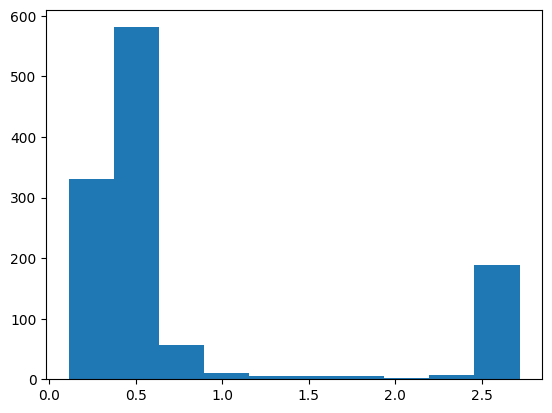

In [26]:
plt.hist(dist_from_f_starts[-3])